<a href="https://colab.research.google.com/github/jwalin9900/CreditScoringDash/blob/master/XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('australian1.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state=1)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87        85
           1       0.79      0.77      0.78        53

    accuracy                           0.83       138
   macro avg       0.82      0.82      0.82       138
weighted avg       0.83      0.83      0.83       138

XGB: ROC AUC=0.922


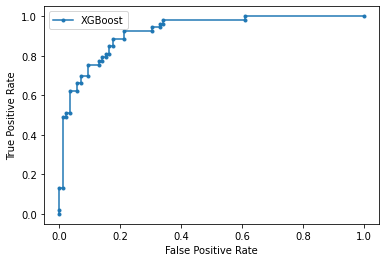

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

XGB_prob=classifier.predict_proba(X_test)
XGB_prob = XGB_prob[:, 1]

XGB_auc=roc_auc_score(y_test,XGB_prob)
print('XGB: ROC AUC=%.3f' % XGB_auc)

XGB_fpr,XGB_tpr,_=roc_curve(y_test,XGB_prob)
plt.plot(XGB_fpr, XGB_tpr, marker='.', label='XGBoost')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()